In [1]:
import pandas as pd
import numpy as np
from env import get_connection
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from pydataset import data

# Clustering with the Iris Dataset

- Using this lesson as a guide, perform clustering on the iris dataset.

a. Choose features other than the ones used in the lesson.



In [2]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
iris = iris.rename(columns = {'Sepal.Length' : 'Sepal_Length', 'Sepal.Width' : 'Sepal_Width', 'Petal.Length' : 'Petal_length', 'Petal.Width':'Petal_Width', 'Species': 'Species'})
iris.head()

,Sepal_Length,Sepal_Width,Petal_length,Petal_Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_cluster = iris[['Petal_length', 'Sepal_Width']]
iris_cluster.head()

,Petal_length,Sepal_Width
1,1.4,3.5
2,1.4,3.0
3,1.3,3.2
4,1.5,3.1
5,1.4,3.6


In [5]:
Kmeans = KMeans(n_clusters = 3)
Kmeans.fit(iris_cluster)
Kmeans.predict(iris_cluster)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2], dtype=int32)

In [6]:
iris['iris_cluster'] = Kmeans.predict(iris_cluster)
iris.head()

,Sepal_Length,Sepal_Width,Petal_length,Petal_Width,Species,iris_cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


In [7]:
Kmeans.cluster_centers_

array([[4.32807018, 2.75087719],
       [1.462     , 3.428     ],
       [5.67209302, 3.03255814]])

In [20]:
iris_cluster.columns[:2]


Index(['Petal_length', 'Sepal_Width'], dtype='object')

In [21]:
centroids = pd.DataFrame(Kmeans.cluster_centers_, columns = iris_cluster.columns[:2])
centroids

,Petal_length,Sepal_Width
0,4.328070,2.750877
1,1.462000,3.428000
2,5.672093,3.032558


b. Visualize the results of your clustering.


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

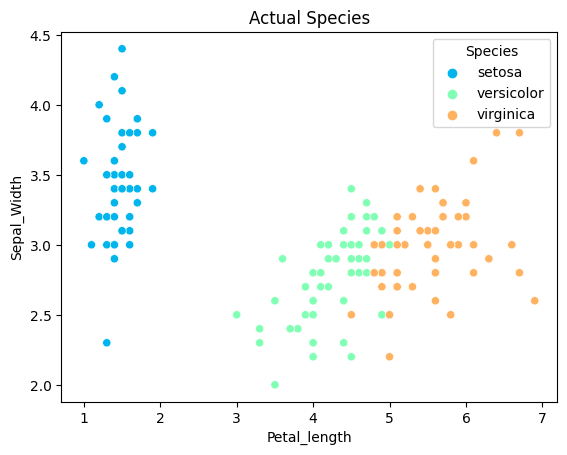

In [23]:
# visualization of original data
sns.scatterplot(iris, x = 'Petal_length', y = 'Sepal_Width', hue='Species', palette = 'rainbow')
plt.xlabel('Petal_length')
plt.ylabel('Sepal_Width')
plt.title('PL vs SW by species')
plt.title('Actual Species')
plt.show()

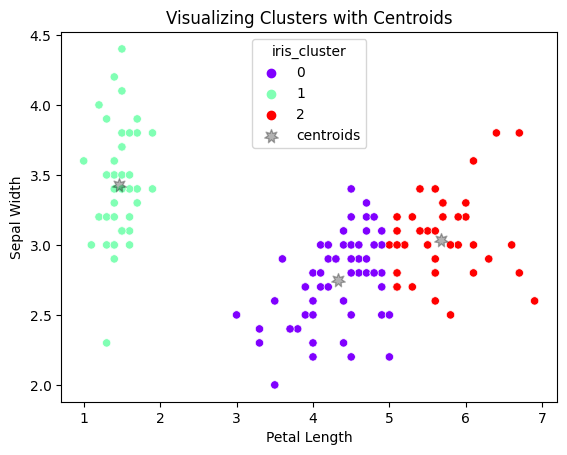

In [24]:
# Visualization of cluster
sns.scatterplot(iris, x = 'Petal_length', y = 'Sepal_Width', hue = 'iris_cluster', palette = 'rainbow')

centroids.plot.scatter(x = 'Petal_length', y = 'Sepal_Width', ax = plt.gca(), color ='k', alpha = 0.3, s = 100, marker = (7,1,0), label = 'centroids')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.title('PL vs SW by Clusters')
plt.title('Visualizing Clusters with Centroids')

plt.show()


c. Use the elbow method to visually select a good value for k.

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
inertia_table = []

for n in range (1, 21):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(iris_cluster)
    inertia_table.append(kmeans.inertia_)
    

In [ ]:
plt.plot(np.arange(1,21,), inertia_table,marker='o', color='pink')

plt.xticks(np.arange(1,21,step=1,))


plt.title('Change in Inertia')

plt.show()

d. Repeat the clustering, this time with 3 different features.


In [ ]:
three_features = iris[['Petal_length', 'Sepal_Width', 'Petal_Width']]
three_features.head()

In [ ]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(three_features)

kmeans.predict(three_features)

In [ ]:
iris['3_features'] = kmeans.predict(three_features)
iris.head()

In [ ]:
kmeans.cluster_centers_


In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = three_features.columns[:3])

centroids

# 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!



In [9]:
import wrangle_mall as wm
import wrangle_zillow as w

In [10]:
mall = wm.acquire_mall()# got data


In [11]:
encode = ['gender']
mall = w.encode_columns(mall, encode)

In [12]:
mall = mall.drop(columns = ['customer_id'])

In [13]:
train, validate, test = w.split_data(mall)

train: 120 (60% of 200)
validate: 40 (20% of 200)
test: 40 (20% of 200)


In [14]:
# sacling with MM
train_mm, validate_mm, test_mm = w.multi_scaler(train, validate, test, scaler = 'MM')

<Axes: >

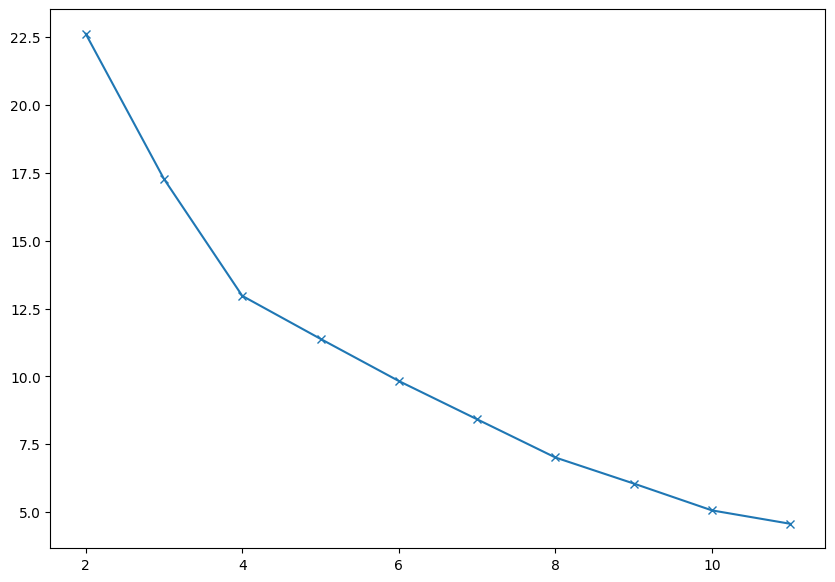

In [27]:
# plot intertia
plt.figure(figsize = (10,7))
pd.Series({k : KMeans(k).fit(train_mm).inertia_ for k in range(2, 12)}).plot(marker = 'x')
           

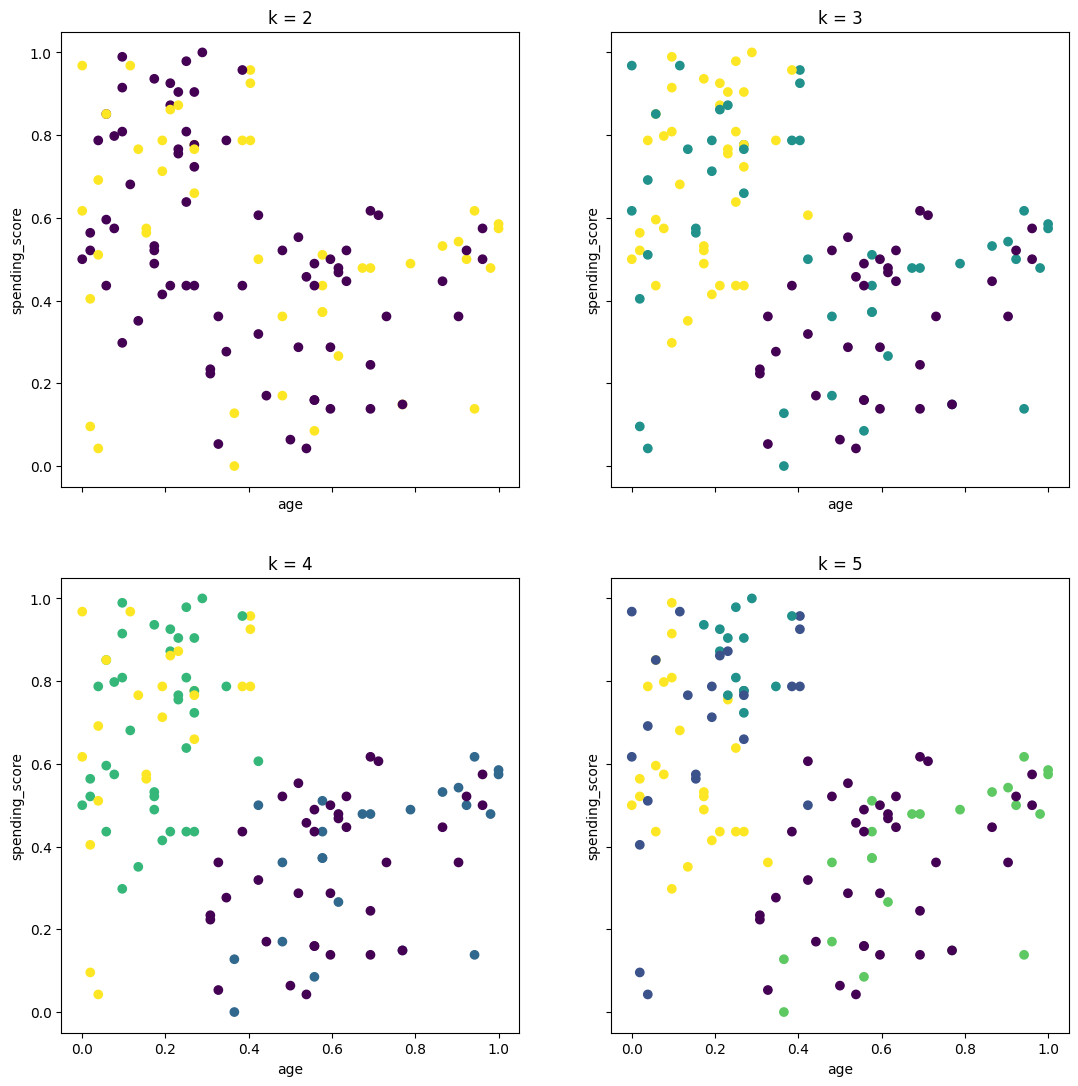

In [28]:
# Visualize each K Value

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(train_mm).predict(train_mm)
    ax.scatter(train_mm['age'], train_mm['spending_score'], c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='spending_score')

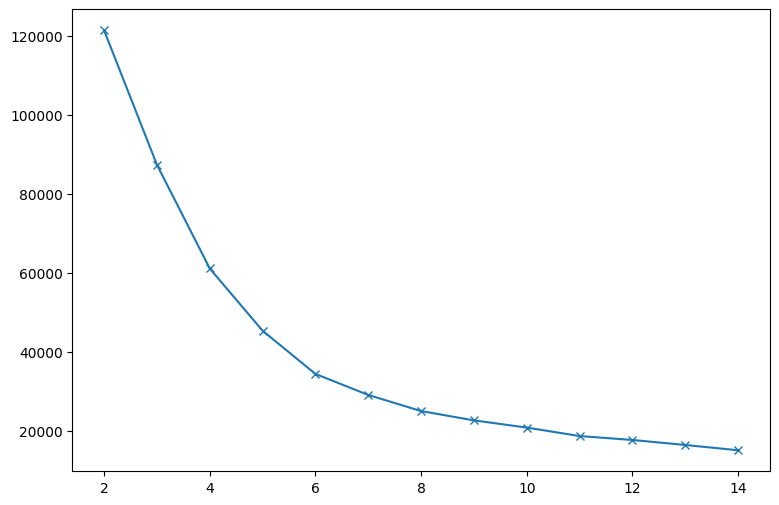

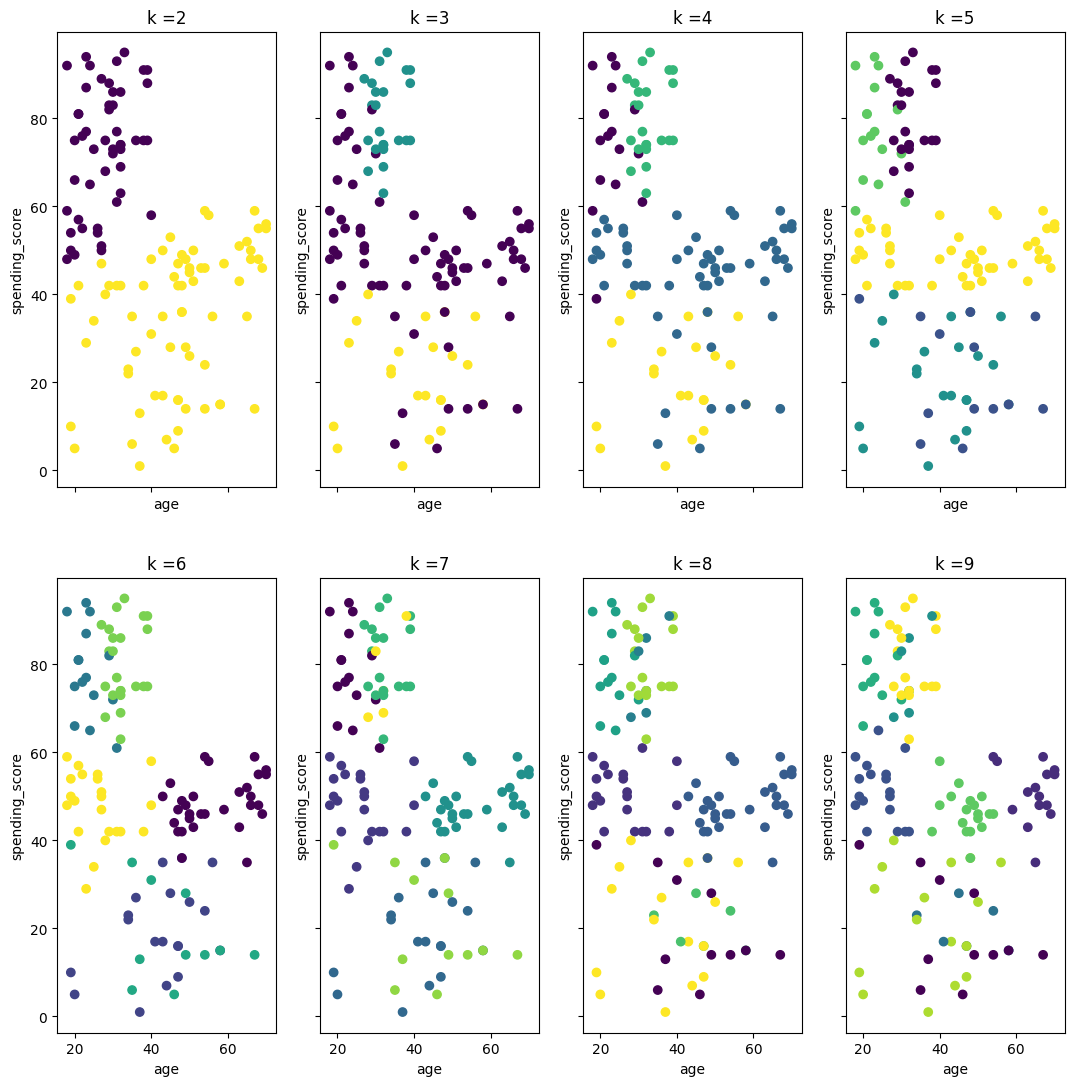

In [31]:
# Visualize inertia unscaled dat
# plot inertia
plt.figure(figsize=(9,6))
pd.Series({k: KMeans(k).fit(train).inertia_ for k in range( 2, 15)}).plot(marker = 'x')
# visualize each k value unscaled ata 
fig, axs = plt.subplots(2,4, figsize = (13,13), sharex = True, sharey = True)
for ax, k in zip (axs.ravel(), range(2,10)):
    clusters = KMeans(k).fit(train).predict(train)
    ax.scatter(train['age'], train['spending_score'], c = clusters)
    ax.set(title = 'k ={}'.format(k), xlabel = 'age', ylabel = 'spending_score')
                        

# 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.



Our train_mm, validate_mm, and test_mm is scaled with MinMax(encode gender)

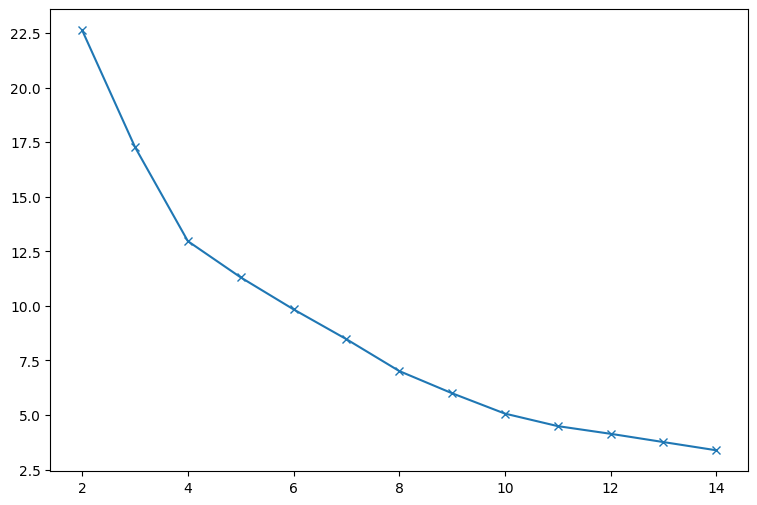

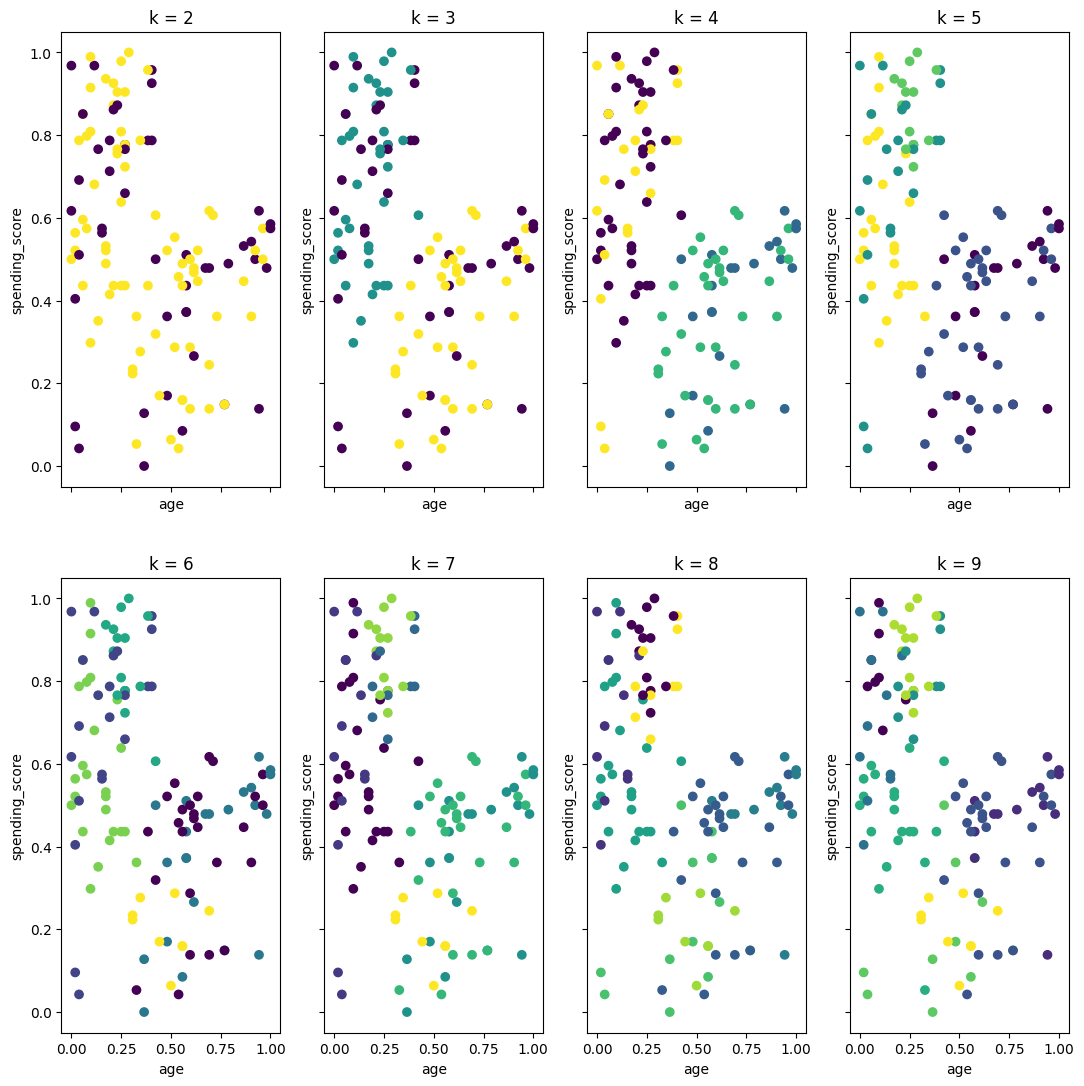

In [32]:
# Plot intertia
plt.figure(figsize=(9,6))
pd.Series({k: KMeans(k).fit(train_mm).inertia_ for k in range(2, 15)}).plot(marker='x')

# Visualize each K Value (scaled)
fig, axs = plt.subplots(2, 4, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 10)):
    clusters = KMeans(k).fit(train_mm).predict(train_mm)
    ax.scatter(train_mm['age'], train_mm['spending_score'], c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='spending_score')

In the inertia plot, scaled data shows a clear "elbow," making it easier to pick the best number of clusters. Unscaled data doesn't have a distinct elbow, making it harder to choose.

In the K plots, clustering doesn't seem to align well with just age, likely because the model considers multiple features, not just age. Age was chosen for plotting because it's most correlated with spending score.